In [1]:
import base64
from io import BytesIO
from PIL import Image

# 若img.save()报错 cannot write mode RGBA as JPEG
# 则img = Image.open(image_path).convert('RGB')
def image_to_base64(image_path):
    img = Image.open(image_path)
    output_buffer = BytesIO()
    img.save(output_buffer, format='JPEG')
    byte_data = output_buffer.getvalue()
    return str(base64.b64encode(byte_data), encoding='utf8')

In [2]:
import re
import base64
from io import BytesIO
from PIL import Image

def base64_to_image(base64_str, image_path=None):
    base64_data = re.sub('^data:image/.+;base64,', '', base64_str)
    byte_data = base64.b64decode(base64_data)
    image_data = BytesIO(byte_data)
    img = Image.open(image_data)
    if image_path:
        img.save(image_path)
    return img

In [5]:
# 模拟请求
import requests

url = 'http://192.168.80.245:20950/image_pose'
body = {
    'pic': image_to_base64('yumaoqiu.jpeg'),
    'return_image': True,
}
print(body['pic'][:20])
data = requests.post(url, json=body).json()
print(data['code'], data['data'].keys())

/9j/4AAQSkZJRgABAQAA
0 dict_keys(['keypoints', 'pic'])


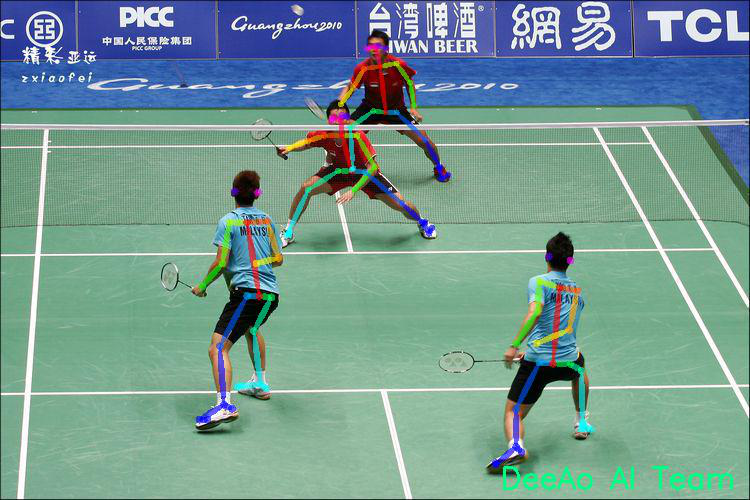

In [6]:
%matplotlib inline
from IPython.display import display
img = base64_to_image(data['data']['pic'])
display(img)

In [10]:
# 模拟请求
import requests

url = 'http://192.168.80.245:20950/image_pose'
body = {
    'pic_path': 'demo_images/zuqiu.jpeg',
    'return_image': True,
}
data = requests.post(url, json=body).json()
print(data['code'], data['data'].keys())

0 dict_keys(['keypoints', 'pic'])


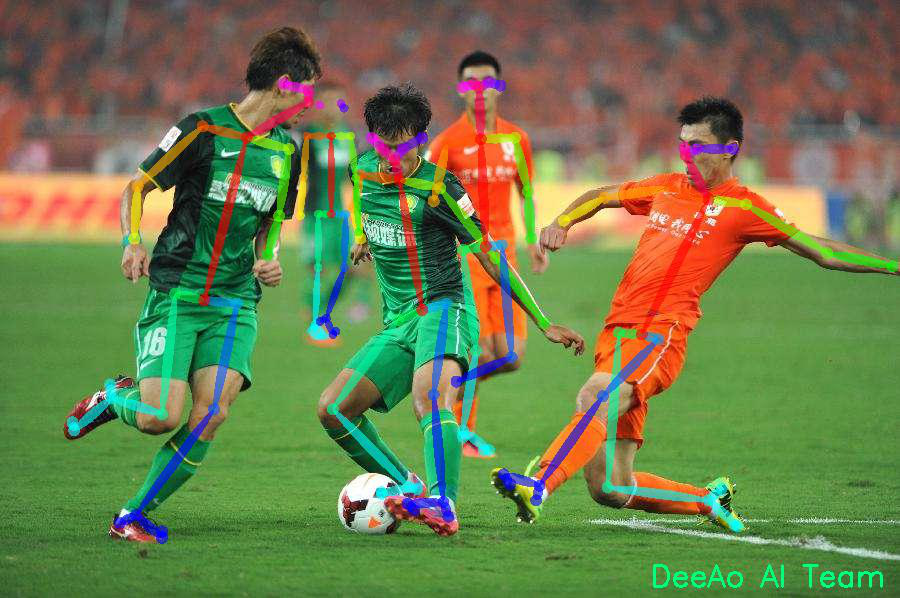

In [11]:
from IPython.display import display
img = base64_to_image(data['data']['pic'])
display(img)